<a href="https://colab.research.google.com/github/Bhavya0608-hub/MNIST-Digit-Classification--Deep-Learning/blob/main/MNIST_Digit_Classification_(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
Y_train.shape

(60000,)

In [8]:
Y_test.shape

(10000,)

In [9]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [10]:
print(X_train[10].shape)

(28, 28)


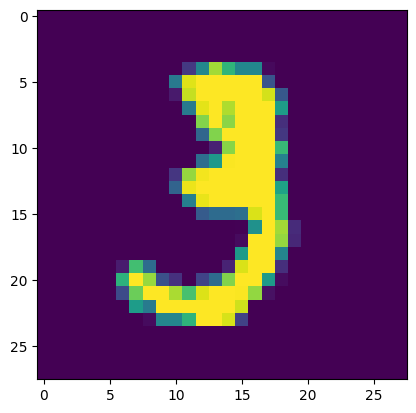

3


In [13]:
plt.imshow(X_train[10])
plt.show()

#printing label
print(Y_train[10])

In [14]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [15]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [16]:
#scaling the image
X_train = X_train/255
X_test = X_test/255

In [17]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**building neural network**

In [19]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#training
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8504 - loss: 0.5188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9556 - loss: 0.1475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1045
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9760 - loss: 0.0807
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9798 - loss: 0.0652
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0453
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0398
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9887 - loss: 0.0355
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0307


In [22]:
loss, accuracy= model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1304
0.9708999991416931
0.11350829899311066


In [23]:
print(X_test.shape)

(10000, 28, 28)


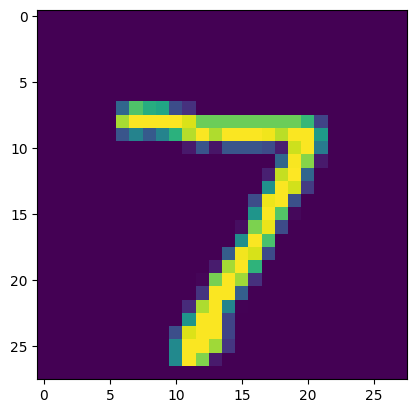

In [24]:
plt.imshow(X_test[0])
plt.show()

In [25]:
print(Y_test[0])

7


In [26]:
Y_pred= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
Y_pred.shape

(10000, 10)

In [28]:
print(Y_pred[0])

[6.5783440e-04 2.0486901e-02 1.4802180e-01 9.8747969e-01 8.7951264e-08
 3.0382925e-03 9.2302381e-11 9.9999952e-01 6.2301598e-02 9.7039706e-01]


In [29]:
label_for_first_image= np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [30]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Building Confusion Matrix

In [31]:
conf_mat= confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 955    0    1    0    1    2   12    1    2    6]
 [   0 1112    2    7    1    1    2    0   10    0]
 [   5    3  985   14    6    0    5    6    8    0]
 [   0    0    3  989    0    1    2    4    6    5]
 [   1    0    1    0  962    1    7    2    3    5]
 [   2    1    0   45    2  824    6    2    7    3]
 [   3    3    1    0    3    4  944    0    0    0]
 [   0    2    8    4    3    0    0  992    4   15]
 [   2    0    5    7    4    1    2    2  947    4]
 [   1    2    1    8   16    7    0    2    8  964]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

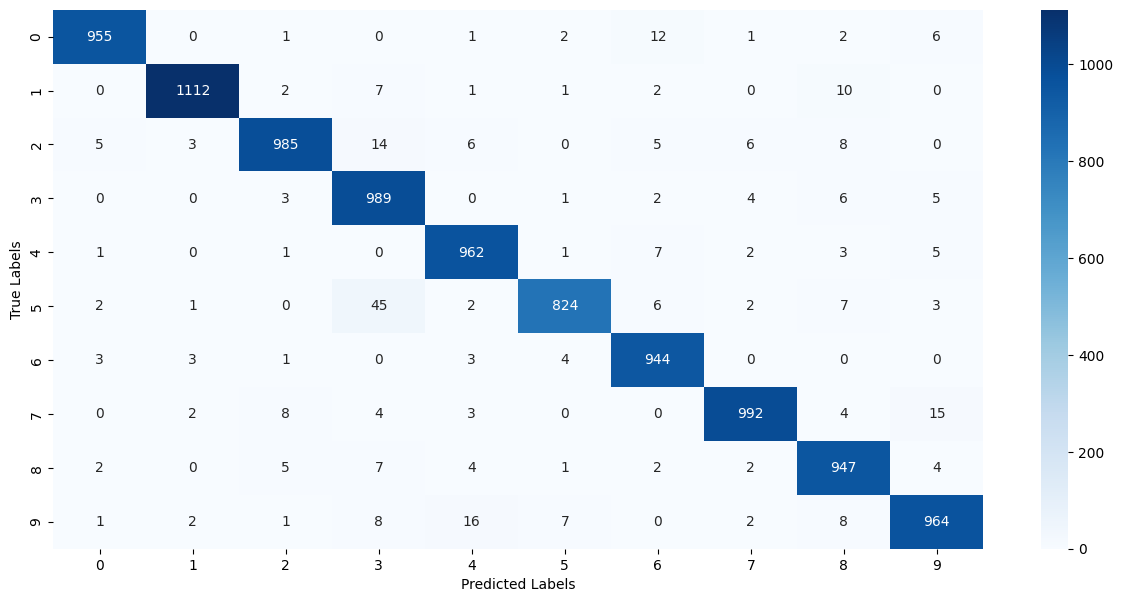

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

<class 'numpy.ndarray'>
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


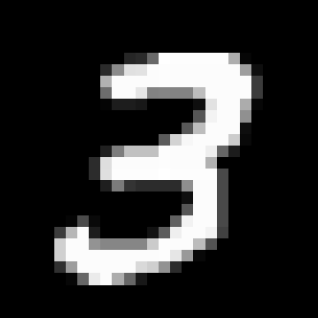

In [34]:
input_image_path= '/content/MNIST_digit.png'
input_image= cv2.imread(input_image_path)
print(type(input_image))
print(input_image)
cv2_imshow(input_image)


In [36]:
input_image.shape

(318, 318, 3)

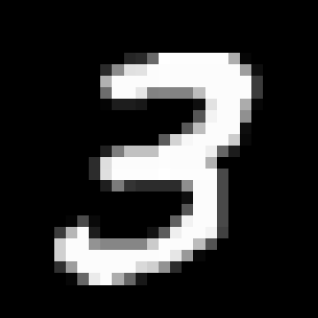

In [37]:
grayscale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [38]:
grayscale.shape

(318, 318)

In [41]:
input_image_resized= cv2.resize(grayscale, (28,28))
cv2_imshow(input_image_resized)

In [42]:
input_image_resized.shape

(28, 28)

In [43]:
input_image_resized/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
image_reshaped= np.reshape(input_image_resized, [1,28,28])

In [49]:
input_prediction= model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]]


In [50]:
input_pred_labels= np.argmax(input_prediction)

In [48]:
print(input_pred_labels)

3


***Predictive System***

Path of the image to be predicted: /content/MNIST_digit.png


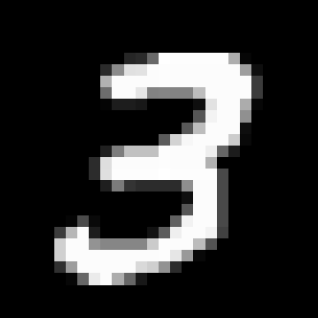

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Label is:  3


In [51]:
input_image_path= input("Path of the image to be predicted: ")

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized= cv2.resize(grayscale, (28,28))

image_reshaped= np.reshape(input_image_resized, [1,28,28])

input_prediction= model.predict(image_reshaped)

input_pred_labels= np.argmax(input_prediction)

print("Predicted Label is: ", input_pred_labels)